In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
from torch.utils.data.sampler import SubsetRandomSampler, Sampler
import scipy.io as io

from torchvision import transforms

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

!wget -c http://ufldl.stanford.edu/housenumbers/train_32x32.mat http://ufldl.stanford.edu/housenumbers/test_32x32.mat

--2020-05-24 08:09:42--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2020-05-24 08:09:43--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Reusing existing connection to ufldl.stanford.edu:80.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [0]:
# First, lets load the dataset
data_train = dset.SVHN('./', 
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize(mean=[0.43,0.44,0.47],
                                               std=[0.20,0.20,0.20])                           
                       ])
                      )
data_test = dset.SVHN('./', split='test', transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize(mean=[0.43,0.44,0.47],
                                               std=[0.20,0.20,0.20])                           
                       ]))

(32, 32, 3, 73257)
(32, 32, 3, 26032)


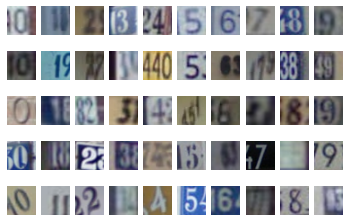

In [0]:
#загрузка и визуализация данных из задания 1.1 - Метод К-ближайших соседей
def load_data_mat(filename, max_samples, seed=42):
    '''
    Loads numpy arrays from .mat file

    Returns:
    X, np array (num_samples, 32, 32, 3) - images
    y, np array of int (num_samples) - labels
    '''
    raw = io.loadmat(filename)
    X = raw['X']  # Array of [32, 32, 3, n_samples]
    print(X.shape)
    y = raw['y']  # Array of [n_samples, 1]
    X = np.moveaxis(X, [3], [0])
    y = y.flatten()
    # Fix up class 0 to be 0
    y[y == 10] = 0

    np.random.seed(seed)
    samples = np.random.choice(np.arange(X.shape[0]),
                               max_samples,
                               replace=False)
    
    return X[samples].astype(np.float32), y[samples]

max_train=1000
max_test=1000
train_X, train_y = load_data_mat("train_32x32.mat", max_train)
test_X, test_y = load_data_mat("test_32x32.mat", max_test)

samples_per_class = 5  # Number of samples per class to visualize
plot_index = 1
for example_index in range(samples_per_class):
    for class_index in range(10):
        plt.subplot(5, 10, plot_index)
        image = train_X[train_y == class_index][example_index]
        plt.imshow(image.astype(np.uint8))
        plt.axis('off')
        plot_index += 1


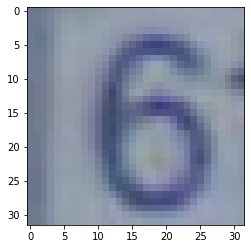

In [0]:
plt.imshow(train_X[0].astype(np.uint8))

In [0]:
train_X[0].shape

(32, 32, 3)